In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map
world = gpd.read_file("/Users/aamnasoniwala/Desktop/ne_110m_admin_0_countries (1)/ne_110m_admin_0_countries.shp")

# Check column names
print(world.columns)

print(world[world["SOVEREIGNT"].str.contains("Brunei", case=False, na=False)])


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
          featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
149  Admin-0 country          1          6     Brunei    BRN         0      2   

                  TYPE TLC   ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
149  Sovereign country   1  Brunei  ...      None       None      None   

    FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
149      None       None      None      None       None      None   

                                              geometry  
149  POLYGON ((115.45071 5.44773, 115.4057 4.95523,...  

[1 rows x 169 columns]


In [11]:
world["SOVEREIGNT"].unique()

array(['Fiji', 'United Republic of Tanzania', 'Western Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Democratic Republic of the Congo', 'Somalia', 'Kenya', 'Sudan',
       'Chad', 'Haiti', 'Dominican Republic', 'Russia', 'The Bahamas',
       'United Kingdom', 'Norway', 'Denmark', 'France', 'East Timor',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'Ecuador', 'Jamaica', 'Cuba', 'Zimbabwe',
       'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin',
       'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', 'Ivory Coast',
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone',
       'Burkina Faso', 'Central African Republic',
       'Republic of the Congo', 'Gabon', 'Equatorial

/var/folders/k7/_r7nqc9s78jfx1ftfzjxmfwc0000gn/T/ipykernel_30653/2627124054.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world["Diabetes Precision Medicine Research Output"].fillna(0, inplace=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


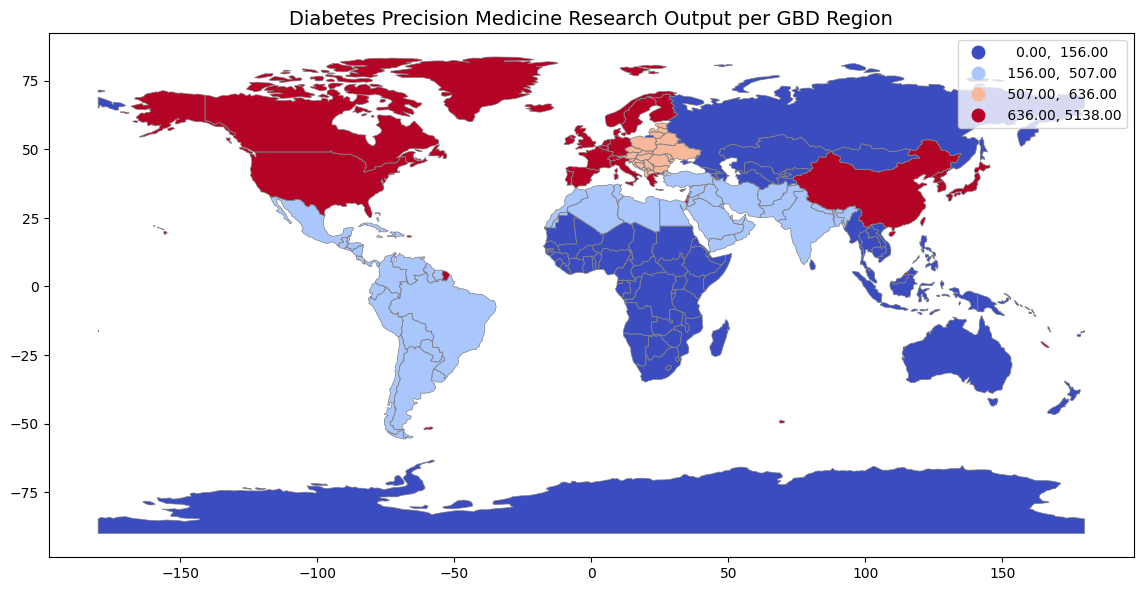

In [13]:
# Research output data
data = {
    "GBD Region": ["Central Asia", "Central and Eastern Europe", "East Asia", "Latin America & Caribbean", "Middle East & North Africa", "South East Asia & Pacific Islands", "South Asia", "Sub Saharan Africa", "North America", "Western Europe"],
    "Diabetes Precision Medicine Research Output": [36, 636, 2178, 210, 507, 142, 253, 156, 5138, 3177]
}
df = pd.DataFrame(data)

# Mapping GBD regions to countries
gbd_to_countries = {
    "Central Asia": ["Armenia", "Azerbaijan", "Georgia", "Kazakhstan", "Uzbekistan", "Turkmenistan", "Kyrgyzstan", "Tajikistan", "Mongolia"],
    "Central and Eastern Europe": ["Belarus", "Ukraine", "Poland", "Austria", "Hungary",
        "Moldova", "Romania", "Lithuania", "Latvia", "Estonia", "Bulgaria", "Albania", "Croatia", "Slovakia", "Czechia", "Bosnia and Herzegovina",
        "North Macedonia", "Republic of Serbia", "Montenegro", "Kosovo", "Slovenia", "Russian Federation"],
    "East Asia": ["China", "Taiwan", "Japan", "Singapore", "North Korea", "South Korea", "Brunei"],
    "Latin America & Caribbean": ["Argentina", "Chile", "Mexico", "Uruguay", "Brazil", "Bolivia", "Peru", "Colombia", "Panama", "Costa Rica", "Nicaragua", "Honduras", "El Salvador", "Guatemala", "Belize", "Venezuela", "Guyana", "Suriname", "Ecuador", "Jamaica", "Cuba", "Haiti", "Dominican Republic", "Trinidad and Tobago", "Paraguay", "The Bahamas", "Antigua and Barbuda", "Saint Kitts and Nevis", "Barbados", "Dominica", "Grenada", "Saint Lucia", "Saint Vincent and the Grenadines"],
    "Middle East & North Africa": ["Afghanistan", "Algeria", "Bahrain", "Egypt", "Libya", "Morocco", "Tunisia", "Lebanon", "Jordan", "United Arab Emirates", "Qatar", "Kuwait", "Iraq", "Oman", "Yemen", "Saudi Arabia", "Syria", "Iran", "Palestine", "Turkey", "Western Sahara"],
    "South East Asia & Pacific Islands": [
        "Fiji", "Kiribat", "Marshall Islands", "Micronesia",  "Nauru", "Niue", "Palau", "Vanuatu", "Cambodia", "Thailand", "Lao People's Democratic Republic", "Myanmar", "Vietnam", "Philippines", "Malaysia", "Solomon Islands", "Papua New Guinea", "Indonesia", "East Timor", "Maldives", "Sri Lanka", "Mauritius", "Seychelles", "Samoa", "Tonga", "Tuvalu"],
    "South Asia": ["India", "Bangladesh", "Bhutan", "Nepal", "Pakistan"],
    "Sub Saharan Africa": ["Democratic Republic of the Congo", "Somalia", "Kenya", "Sudan", "Chad",
        "Senegal", "Mali", "Benin", "Niger", "Nigeria", "Cameroon",
        "Togo", "Ghana", "Ivory Coast", "Guinea", "Guinea-Bissau", "Liberia",
        "Sierra Leone", "Burkina Faso", "Central African Republic",
        "Republic of the Congo", "Gabon", "Equatorial Guinea", "Zambia",
        "Malawi", "Mozambique", "Eswatini", "Angola", "Burundi", "Madagascar",
        "Gambia", "Eritrea", "Ethiopia", "Djibouti", "Uganda",
        "Rwanda", "South Sudan", "Zimbabwe", "Botswana", "Namibia", "Lesotho",
        "South Africa", "United Republic of Tanzania", "Comoros", "Cabo Verde", "Mauritania", "Sao Tome and Principe"],
    "North America": ["Canada", "United States of America"],
        "Western Europe": ["Andorra", "United Kingdom", "Norway", "Denmark", "France", "Sweden", "Germany",
            "Switzerland", "Luxembourg", "Belgium", "Netherlands", "Portugal",
            "Spain", "Ireland", "Finland", "Iceland", "Italy", "Cyprus", "Israel", "Greece", "Malta", "Monaco", "San Marino"]
    }

# Countries data 
country_output = []
for region, output in zip(df["GBD Region"], df["Diabetes Precision Medicine Research Output"]):
    for country in gbd_to_countries.get(region, []):
        country_output.append({"country": country, "Diabetes Precision Medicine Research Output": output})

df_countries = pd.DataFrame(country_output)

# Merge with world map data
world = world.merge(df_countries, left_on="SOVEREIGNT", right_on="country", how="left")

# Fill missing values with 0
world["Diabetes Precision Medicine Research Output"].fillna(0, inplace=True)

# Plot the world map with research output
fig, ax = plt.subplots(figsize=(14, 7))
world.boundary.plot(ax=ax, linewidth=0.5, color="gray")
world.plot(column="Diabetes Precision Medicine Research Output", 
           ax=ax, cmap="coolwarm", legend=True, scheme="quantiles",
           missing_kwds={"color": "lightgrey"})
plt.title("Diabetes Precision Medicine Research Output per GBD Region", fontsize=14)
plt.show()
